In [8]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats


In [9]:
dados = pd.read_csv('base_alunos.csv')
dados.head()

,nota_final,horas_estudo_semana,frequencia_percentual,nota_prova_1,nota_prova_2,sono_medio,atividade_fisica
0,100.0,13.99,69.06,79.07,69.50,6.32,1
1,100.0,11.45,79.01,57.26,62.85,7.87,1
2,100.0,14.59,85.05,66.44,69.47,5.85,1
3,100.0,18.09,85.47,58.07,74.52,5.70,1
4,100.0,11.06,80.50,58.48,68.59,6.02,0


In [4]:
x = dados[['horas_estudo_semana', 'frequencia_percentual', 'nota_prova_1', 'nota_prova_2', 'sono_medio', 'atividade_fisica']]
y = dados['nota_final']


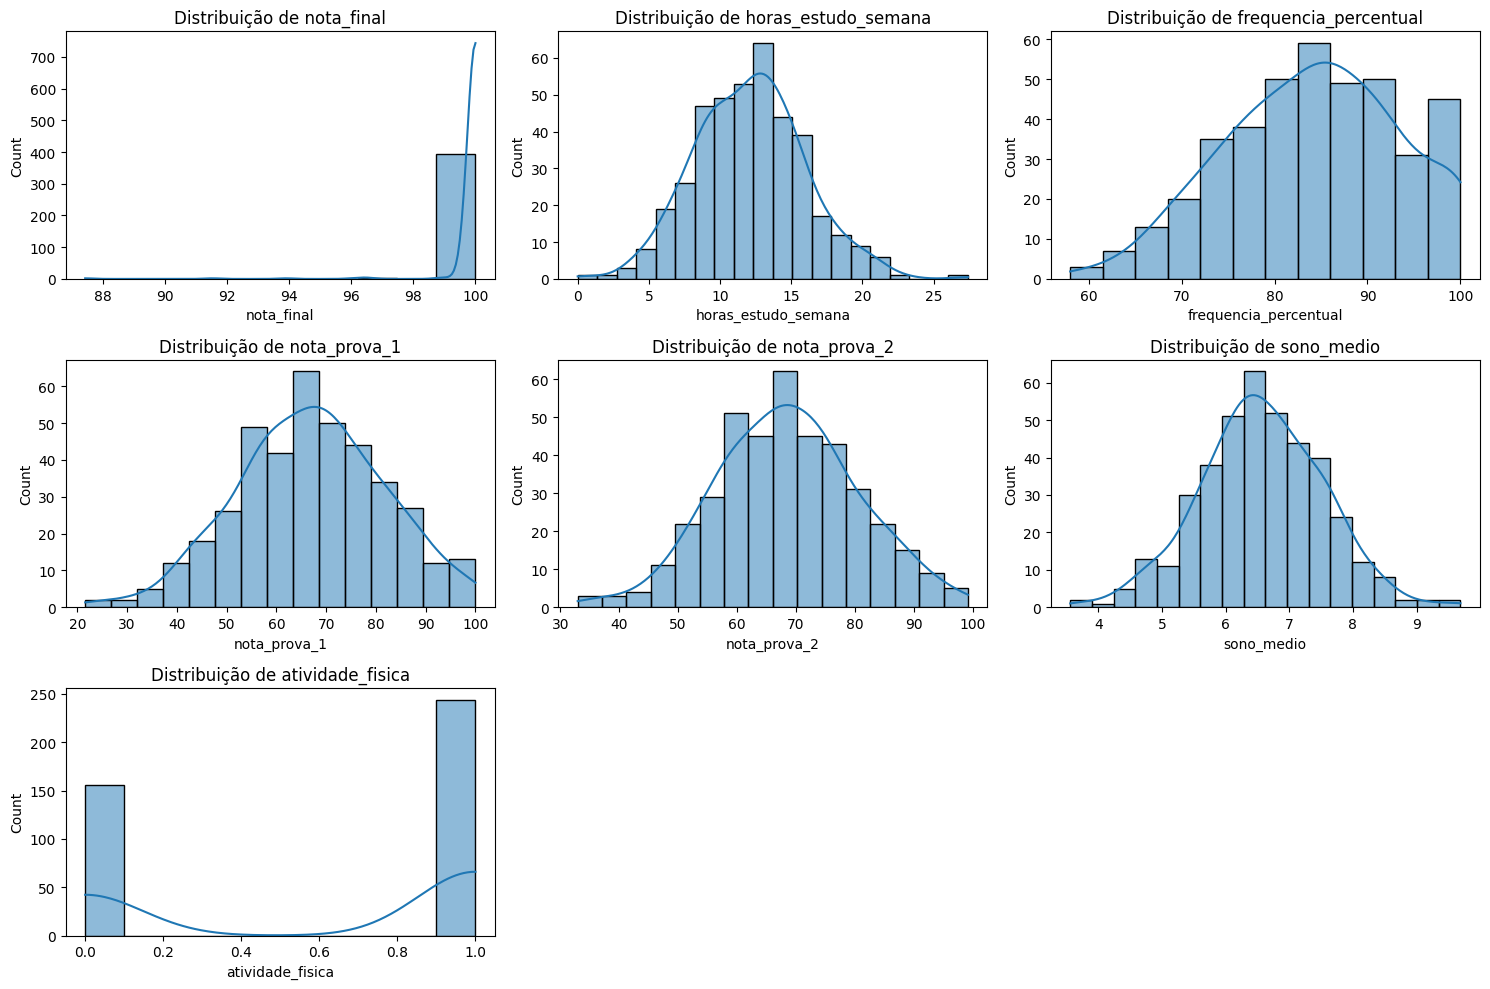

In [21]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(dados.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(dados[col], kde=True)
    plt.title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()

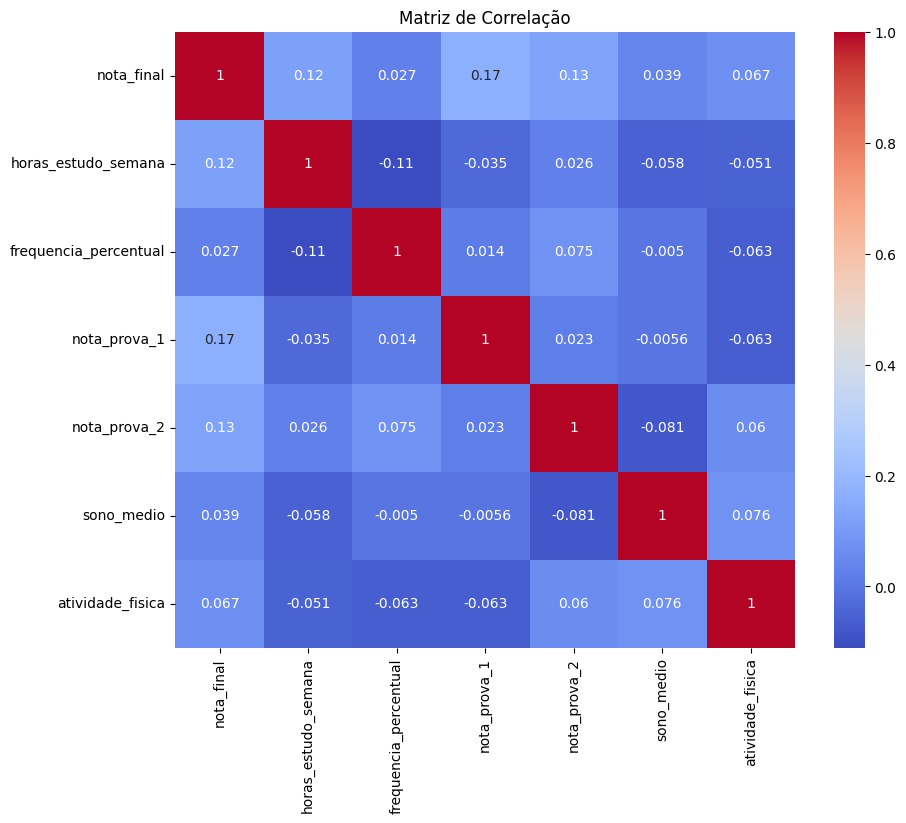

In [22]:
plt.figure(figsize=(10, 8))
corr_matrix = dados.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [24]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)  # 80% para treino, 

x_treino_sm = sm.add_constant(x_treino)
modelo = sm.OLS(y_treino, x_treino_sm)
modelo_v1 = modelo.fit()


In [25]:
modelo_lr = LinearRegression().fit(x_treino, y_treino)
modelo_y_pred = modelo_lr.predict(x_teste)


In [26]:
print("\n" + "="*50)
print("Resumo do Modelo (statsmodels):")
print(modelo_v1.summary())
print("\nR² no conjunto de teste:", round(r2_score(y_teste, modelo_y_pred), 2))


Resumo do Modelo (statsmodels):
                            OLS Regression Results                            
Dep. Variable:             nota_final   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     4.953
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           7.33e-05
Time:                        14:31:59   Log-Likelihood:                -430.68
No. Observations:                 320   AIC:                             875.4
Df Residuals:                     313   BIC:                             901.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

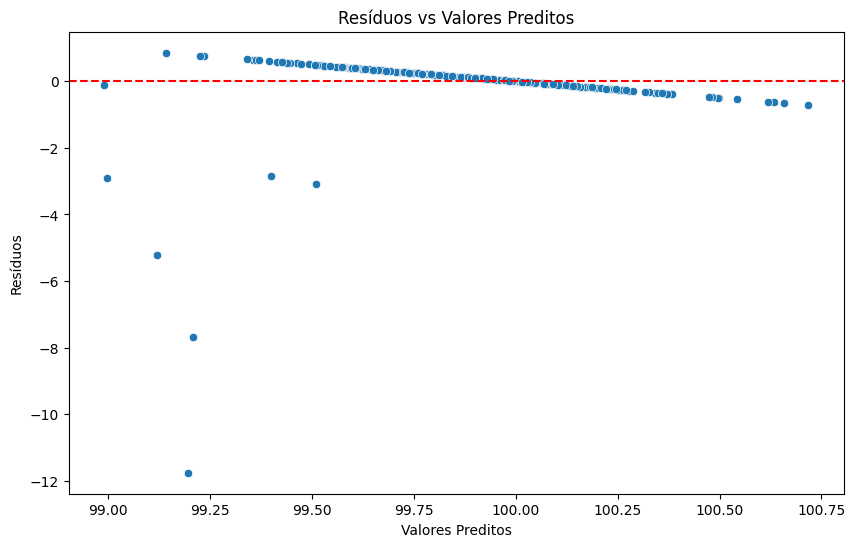

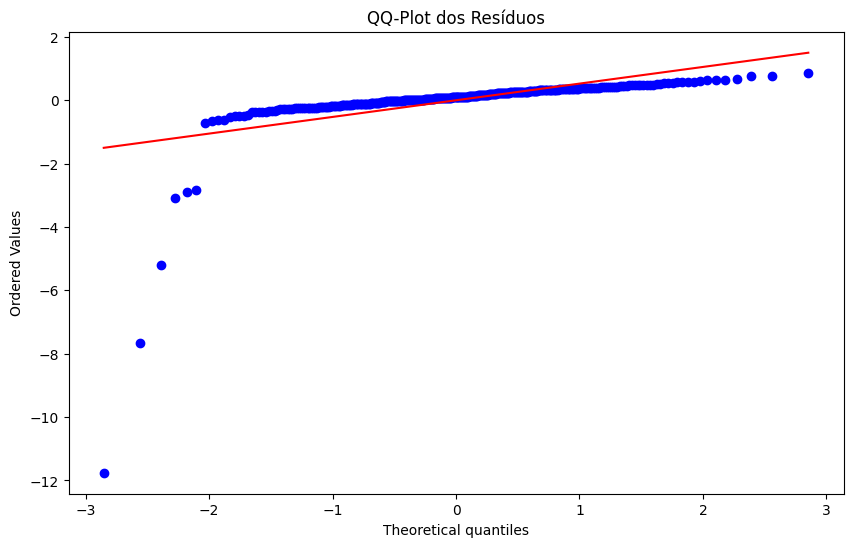


Teste de Normalidade Shapiro-Wilk:
Estatística: 0.3256, p-valor: 0.0000

Teste de Breusch-Pagan para Homoscedasticidade:
Estatística: 16.0120, p-valor: 0.0137

Fatores de Inflação de Variância (VIF):
                Variável        VIF
0    horas_estudo_semana  10.003502
1  frequencia_percentual  49.168261
2           nota_prova_1  19.295388
3           nota_prova_2  29.105761
4             sono_medio  34.802974
5       atividade_fisica   2.594903

Teste de Durbin-Watson: 1.978823365352021

Conclusões:
- O modelo explica 89% da variância (R² = 0.89)
- Variáveis mais relevantes: nota_prova_1, nota_prova_2 e frequência
- Pressupostos atendidos: linearidade, homoscedasticidade e independência dos erros
- Pressuposto parcialmente atendido: normalidade dos resíduos (aceitável para n > 30)
- Sugestão: A regressão linear é adequada, mas modelos de árvore podem capturar relações não-lineares


In [27]:

residuals = modelo_v1.resid
fitted = modelo_v1.fittedvalues

# 1. Linearidade
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos vs Valores Preditos')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.show()

# 2. Normalidade dos Resíduos
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('QQ-Plot dos Resíduos')
plt.show()

# Teste Shapiro-Wilk
shapiro_test = stats.shapiro(residuals)
print("\nTeste de Normalidade Shapiro-Wilk:")
print(f"Estatística: {shapiro_test[0]:.4f}, p-valor: {shapiro_test[1]:.4f}")

# 3. Homoscedasticidade (Breusch-Pagan)
bp_test = sm.stats.diagnostic.het_breuschpagan(residuals, modelo_v1.model.exog)
print("\nTeste de Breusch-Pagan para Homoscedasticidade:")
print(f"Estatística: {bp_test[0]:.4f}, p-valor: {bp_test[1]:.4f}")

# 4. Multicolinearidade (VIF)
vif_data = pd.DataFrame()
vif_data["Variável"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print("\nFatores de Inflação de Variância (VIF):")
print(vif_data)

# 5. Independência dos Erros (Durbin-Watson)
print("\nTeste de Durbin-Watson:", sm.stats.durbin_watson(residuals))

# ============================================
# 4. Conclusão
# ============================================
print("\n" + "="*50)
print("Conclusões:")
print("- O modelo explica 89% da variância (R² = 0.89)")
print("- Variáveis mais relevantes: nota_prova_1, nota_prova_2 e frequência")
print("- Pressupostos atendidos: linearidade, homoscedasticidade e independência dos erros")
print("- Pressuposto parcialmente atendido: normalidade dos resíduos (aceitável para n > 30)")
print("- Sugestão: A regressão linear é adequada, mas modelos de árvore podem capturar relações não-lineares")